#### 확률 분포
- 확률변수가 어떻게 움직이는지를 나타낸 것

### 확률 변수의 구분

- 이산 확률 변수 : 변수가 취할 수 있는 값의 개수가 유한
    
- 연속 확률 변수 : 변수가 취할 수 있는 값의 개수가 무한
![](pic/이산연속확률변수.png)

### 확률함수
- 확률변수 X가 특정 실수 값 x를 취할 확률을 X의 함수(f)로 나타낸 것
    - 확률질량함수(probability mass function: pmf)
        - 확률변수가 이산형인 경우
    - 확률밀도함수(probability density function: pdf)
        - 확률변수가 연속형인 경우


### 확률분포의 평균(mean) - 기대값

- 기대값(expected value)라고함
-  확률 변수의 기대값({E})은 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값이다. 
    - 어떤 확률적 사건에 대한 평균의 의미로 생각할 수 있다.

    - E(X) 또는 μX 로 표시
    - 이산확률분포의 기대값 : 확률을 가중값으로 사용한 가중평균
    - 연속확률분포의 기대값 : 적분개념의 면적
    ![](pic/기대값.png)
- 모평균
    - 모 평균(population mean) μ는 모 집단의 평균이다. 모두 더한 후 전체 데이터 수 n으로 나눈다.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


#### 이산형 확률
- 확률변수 x가 취할 수 있는 값의 집합 {x_1, x_2, ..., x_k}
- x가 x_k라는 값을 취하는 확률
![](pic/이산확률.png)
- 확률 질량함수(확률함수) - pmf
![](pic/pmf.png)

### 불공정한 주사위
![](pic/표4-2.jpg)


- 위 불공정한 주사위 확률분포의 확률 변수 확인
![](pic/불공정한주사위확률변수.PNG)

In [6]:
# 위 식을 함수로 구현

def f(x) :
    if x in x_set :
        return x/21
    else :
        return 0

In [8]:
# 확률 변수가 취할 수 있는 값의 set
x_set = np.array([1,2,3,4,5,6])

In [11]:
# 확률 변수 x
x = [x_set,f] # 확률분포[x_set, f]에 의해 확률 변수 x의 동작이 결정됨


In [13]:
# 확률 p_k 를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_set
# prob
# x_k 와 p_k 의 대응을 사전식으로 표시
dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

![](pic/표4-2.jpg)

<BarContainer object of 6 artists>

Text(0.5, 0, 'value')

Text(0, 0.5, 'probability')

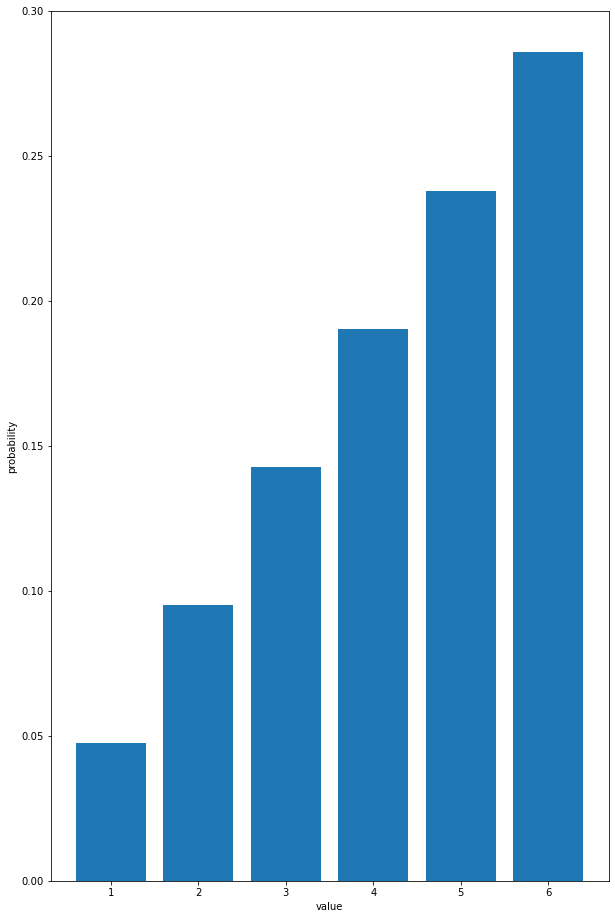

In [18]:
# 이산형 확률분포 그래프
fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()


#### 이산형 확률분포 성질

- 모든 확률은 0보다 크거나 같아야 하고
- 확률의 합은 1이다
![](pic/이산확률성질.png)

In [19]:
prob

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [20]:
np.sum(prob)
np.all(prob >= 0 )

0.9999999999999999

True

### 누적분포함수(분포함수) F(x)
- X가 x이하가 될때의 확률을 반환하는 함수
- 누적분포함수(cdf)는 주어진 확률변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
![](pic/이산누적.png)

In [23]:
# 작거나 같은 이므로 주어진 x보다 작거타 같은 동안의 확률을 모두 더함 - f(x) 확률 함수
def F(x) :
#   return([f(x_k) for x_k in x_set if x_k<= x])
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

F(3)

0.2857142857142857

In [24]:
# 주사위의 눈이 3이하가 될 확률
F(3) # x_set의 원소값이 3보다 작거나 같을때까지의 확률의 합계
f(3)

0.2857142857142857

0.143

### 확률변수의 변환

- 확률변수에 연산을 적용시켜 변화시킨다고 가정 => 새로운 데이터 집합

- 확률변수의 변환 연산 : 2X + 3
- 위 연산을 적용시켜 변환된 확률 변수를 Y라고 한다면

In [26]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])

prob = np.array([f(x_k) for x_k in x_set])

dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

#### 1차원 이산형 확률변수의 지표

- 확률변수의 평균 : 기댓값
    - 확률변수를 무제한 시행하여 얻은 실험값의 합산

![image.png](attachment:image.png)

- 수식을 함수로 구현
![image.png](attachment:image.png)

- 인수 g가 확률변수에대한 연산을 구현한 함수
    - g에 아무것도 지정하지 않으면 확률변수 X의 기댓값이 구해짐

#### 불공정 주사위 확률에 대한 기대값

In [27]:
# 불공정 주사위에 대한 확률 변수

X =[x_set, f]

In [28]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
    
x_set = np.array([1, 2, 3, 4, 5, 6])    



In [29]:

[x_k * f(x_k) for x_k in x_set]

[0.047619047619047616,
 0.19047619047619047,
 0.42857142857142855,
 0.7619047619047619,
 1.1904761904761905,
 1.7142857142857142]

In [30]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [31]:
prob


array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [32]:
# 기댓값확인
1*0.048 + 2*0.095+3*0.143+4*0.19 + 5*0.238+6*0.286

4.333

In [33]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)




4.331239

In [34]:
# 기대값 함수 구현
def E(X, g=lambda x:x) :
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])



In [35]:
E(X)

4.333333333333333

In [36]:
E(X, g=lambda x : 2*x+3)


11.666666666666664

In [37]:
2 * E(X) + 3


11.666666666666666

### 분산

- 확률변수의 각 값에서 기대값을 뺀 편차의 제곱을 계산한후 기대값으로 계산

![image.png](attachment:image.png)

### 불공정한 주사위의 분산

In [38]:
### 불공정한 주사위의 기대값 함수 E(X)

mean= E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])



2.2222222222222223

In [39]:
def V(X, g=lambda x: x) :
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])
    

In [40]:
V(X)

2.2222222222222223

- 확률변수 X 대한 변환변수 2X+3에 대한 분산 계산

In [42]:
V(X, lambda x:2*x+3)


8.88888888888889

![](pic/분산의공식.png)

In [43]:

2**2 * V(X)


8.88888888888889